In [5]:
import pandas as pd
ev_data = pd.read_csv('Electric_Vehicle_Population_Data 2.csv')
print(ev_data.head())

   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA      98122.0        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA      98021.0        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA      98109.0        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA      98027.0        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA      98392.0        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle 

In [6]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [7]:
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [8]:
ev_data = ev_data.dropna()

# Let's analyze EV adoption over time - in the state of Washington

/tmp/ipykernel_16286/932779056.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette='viridis')


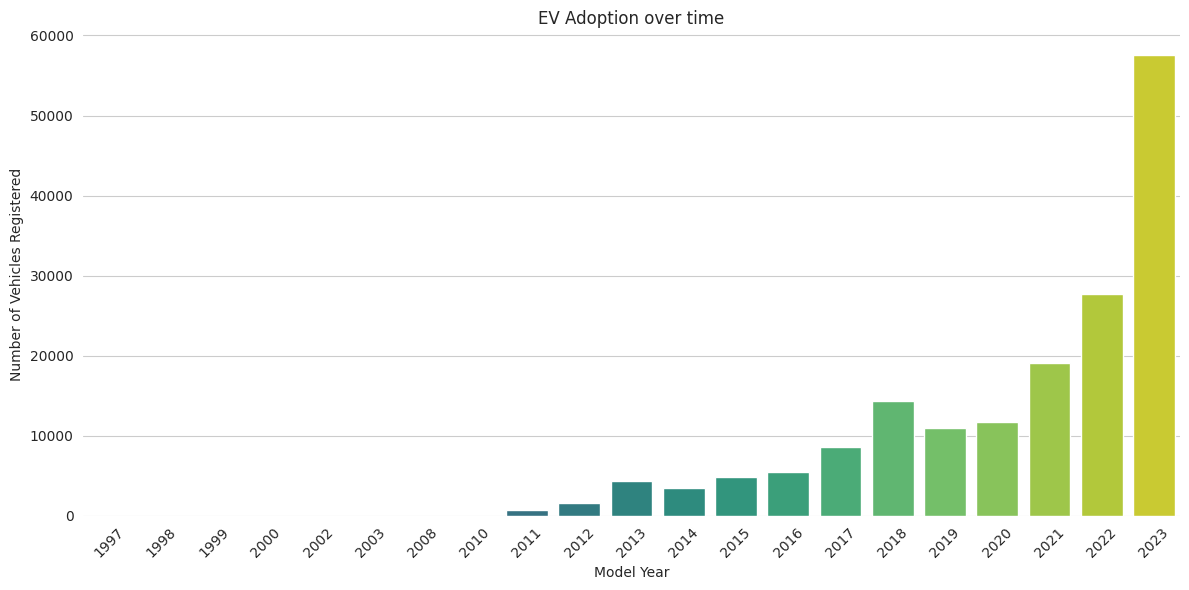

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

#EV Adoption over time

plt.figure(figsize= (12,6))
ev_adoption_by_year = ev_data['Model Year'].value_counts().sort_index()
ev_adoption_by_year = ev_adoption_by_year[ev_adoption_by_year.index != 2024] # Exclude 2024 from the data
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette='viridis')
plt.title('EV Adoption over time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.box(False)
plt.show()

## Electric Vehicle Adoption Trends

The bar chart reveals a compelling narrative of electric vehicle (EV) adoption over time:

### Gradual Growth Phase
From the beginning of the timeline until approximately 2016, EV registrations showed a modest but steady increase. In the early adoption phase, we can abserve EVs gaining traction but they had not yet reached mainstream popularity.

### Acceleration Period
Starting around 2017, the data indicates a notable shift in adoption rates. The number of registered EVs began to grow more rapidly, suggesting a growing public interest and improved accessibility of electric vehicles.

### Peak Adoption
The most striking feature of the chart is the dramatic surge in EV registrations for the year 2023. This bar towers above all others. The sharp increase suggests a possible tipping point where EVs have transitioned from an alternative option to a preferred choice for many consumers.

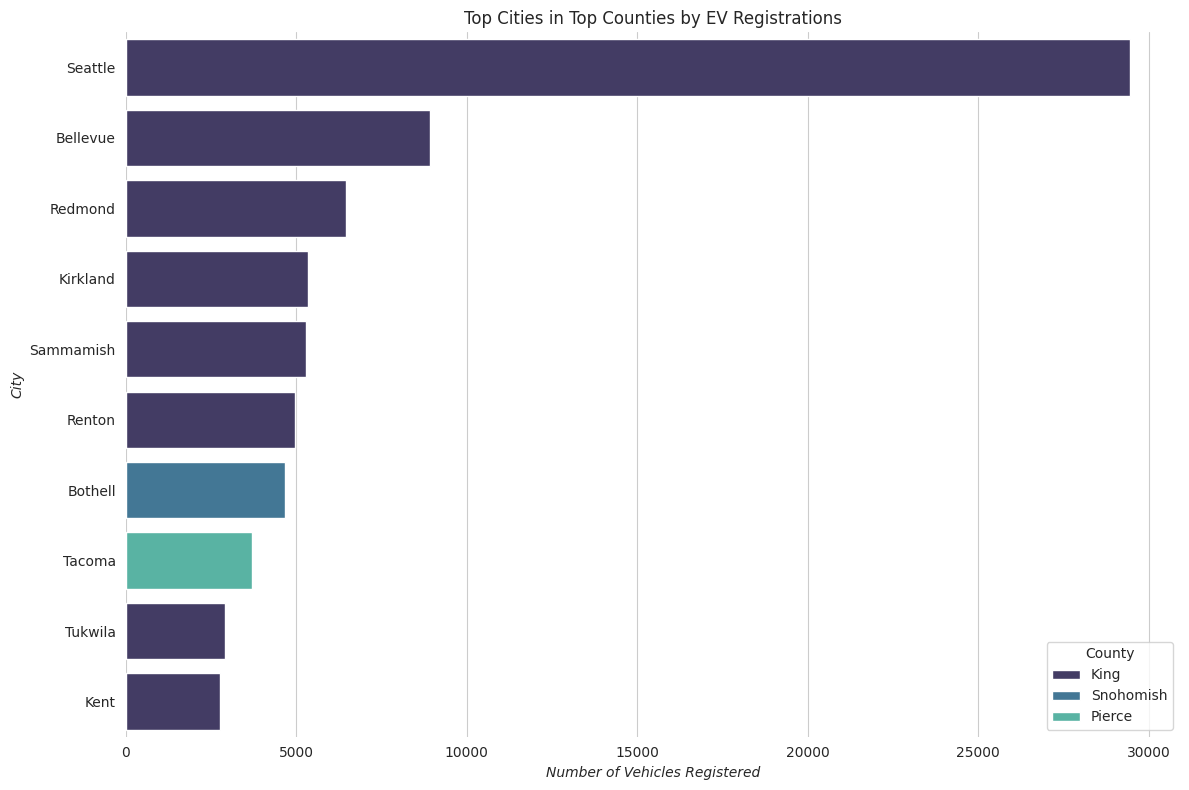

In [22]:
# geographical distribution at county level
ev_county_distribution = ev_data['County'].value_counts()
top_counties = ev_county_distribution.head(3).index

# filtering the dataset for these top counties
top_counties_data = ev_data[ev_data['County'].isin(top_counties)]

# analyzing the distribution of EVs within the cities of these top counties
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualize the top 10 cities across these counties
top_cities = ev_city_distribution_top_counties.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="mako")
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered', fontstyle='italic')
plt.ylabel('City', fontstyle='italic')
plt.legend(title='County')
plt.tight_layout()
plt.box(False)
plt.show()

The above graph compares the number of electric vehicles registered in various cities within three counties: King, Snohomish, and Pierce. Here are the key findings from the above graph:

King County, has three of the cities with highest number of EV registrations. 

### Key Observations

- Seattle leads significantly in EV registrations.
- Bellevue and Redmond follow, but with much lower numbers.
- Kirkland and Sammamish in Snohomish County show moderate EV adoption.
- Tacoma and Tukwila in Pierce County have the lowest registrations among listed cities.
- King County dominates in EV adoption, hosting most cities with high registration numbers.

This data reveals a concentrated EV adoption pattern, with King County, particularly Seattle, at the forefront of the transition to electric vehicles.

/tmp/ipykernel_16286/2485565838.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="rocket")


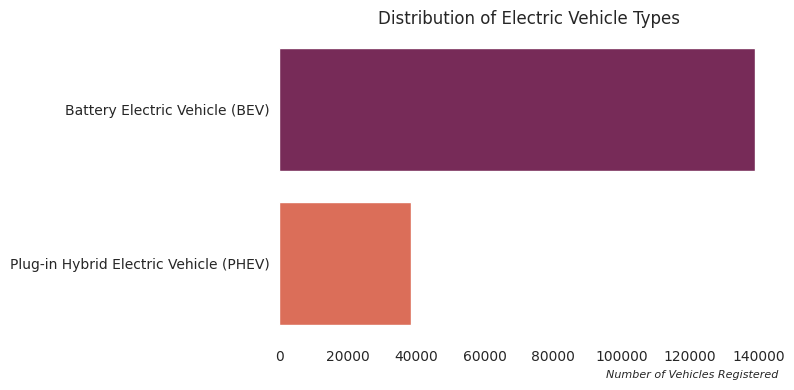

In [36]:
# analyzing the distribution of electric vehicle Types
ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts()
sns.set_style('white')
plt.figure(figsize=(8, 4))
sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="rocket")
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered', fontsize=8, fontstyle='italic', loc='right')
plt.ylabel('', fontsize=8, fontstyle='italic')
plt.tight_layout()
plt.box(False)
plt.show()

The above graph shows that BEVs are more popular or preferred over PHEVs among the electric vehicles registered in Washington State.

## Now let's identify which manufacturers and specific models dominate the EV market

/tmp/ipykernel_16286/981767323.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="cubehelix")


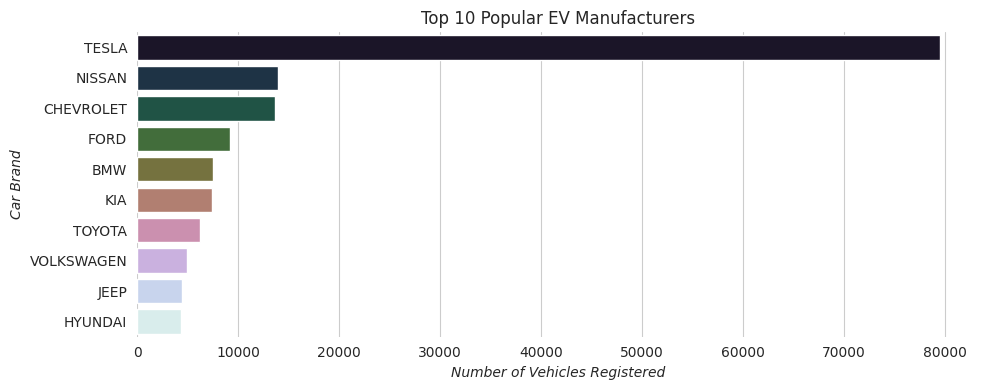

In [47]:
# analyzing the popularity of EV manufacturers
ev_make_distribution = ev_data['Make'].value_counts().head(10)  # Limiting to top 10 for clarity
sns.set_style('whitegrid')
plt.figure(figsize=(10, 4))
sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="cubehelix")
plt.title('Top 10 Popular EV Manufacturers')
plt.xlabel('Number of Vehicles Registered', fontstyle='italic')
plt.ylabel('Car Brand', fontstyle='italic')
plt.tight_layout()
plt.box(False)
plt.show()

The above chart indicates that:

- **TESLA** has the highest number of registered vehicles by a wide margin.
- **NISSAN** ranks second, followed by **CHEVROLET**, both with significantly fewer registrations than TESLA.
- Other manufacturers, including **FORD**, **BMW**, **KIA**, **TOYOTA**, **VOLKSWAGEN**, **JEEP**, and **HYUNDAI**, follow in descending order of registrations.

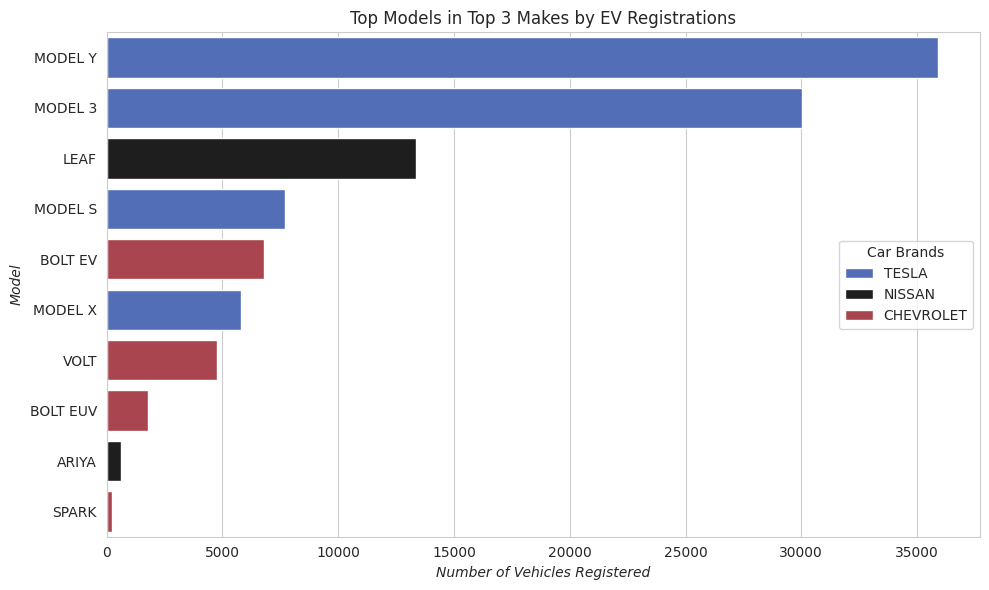

In [61]:
# top 3 manufacturers based on the number of vehicles registered
top_3_manufacturers = ev_make_distribution.head(3).index

# filtering the dataset for these top manufacturers
top_manufacturers_data = ev_data[ev_data['Make'].isin(top_3_manufacturers)]

# analyzing the popularity of EV models within these top manufacturers
ev_model_distribution_top_makes = top_manufacturers_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualizing the top 10 models across these manufacturers for clarity
top_models = ev_model_distribution_top_makes.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="icefire")
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered', fontstyle='italic')
plt.ylabel('Model', fontstyle='italic')
plt.legend(title='Car Brands', loc='center right')
plt.tight_layout()
plt.show()

The above graph shows the distribution of electric vehicle registrations among different models from the top three manufacturers: **TESLA**, **NISSAN**, and **CHEVROLET**. It indicates that:

- **TESLA**’s MODEL Y and MODEL 3 are the most registered vehicles, with MODEL Y having the highest number of registrations.
- **NISSAN**’s LEAF is the third most registered model and the most registered non-**TESLA** vehicle.
- **TESLA**’s MODEL S and MODEL X also have a significant number of registrations.
- **CHEVROLET**’s BOLT EUV and VOLT are the next in the ranking with considerable registrations, followed by BOLT EUV.
- **NISSAN**’s ARIYA and CHEVROLET’s SPARK have the least number of registrations among the models shown.

# Unecessairy - Check for the range of top vehicles

In [89]:
# analyzing the distribution of electric range
#sns.set_style('whitegrid')
#plt.figure(figsize=(10, 6))
#sns.histplot(ev_data['Electric Range'], bins=30, kde=True, color='royalblue')
#plt.title('Distribution of Electric Vehicle Ranges')
#plt.xlabel('Electric Range (miles)', fontstyle='italic')
#plt.ylabel('Number of Vehicles', fontstyle='italic')
#plt.axvline(ev_data['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {ev_data["Electric Range"].mean():.2f} miles')
#plt.legend()
#plt.show()